In [1]:
import nilearn.image as ni
import nibabel as nb
from nilearn.plotting import plot_anat
import SimpleITK as sitk

#%matplotlib notebook
#import gui


def multires_registration(fixed_image, moving_image, initial_transform):
    registration_method = sitk.ImageRegistrationMethod()
    registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.01)
    registration_method.SetInterpolator(sitk.sitkLinear)
    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, estimateLearningRate=registration_method.Once)
    registration_method.SetOptimizerScalesFromPhysicalShift() 
    registration_method.SetInitialTransform(initial_transform, inPlace=False)
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas = [2,1,0])
    registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

    final_transform = registration_method.Execute(fixed_image, moving_image)
    print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
    print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))
    return (final_transform, registration_method.GetMetricValue())

Final metric value: -0.42514272932918884
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.


"\nreader = sitk.ImageSeriesReader()\nfixed_image = sitk.ReadImage(sub_bse_t2, sitk.sitkFloat32)\nmoving_image = sitk.ReadImage(atlas_bse_t2, sitk.sitkFloat32)\n\n\n\ngui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   \n                      title_list = ['fixed image', 'moving image']);\n"

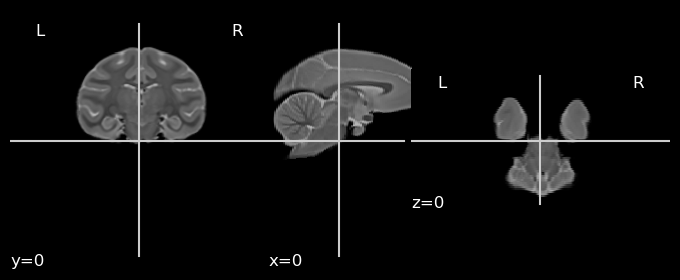

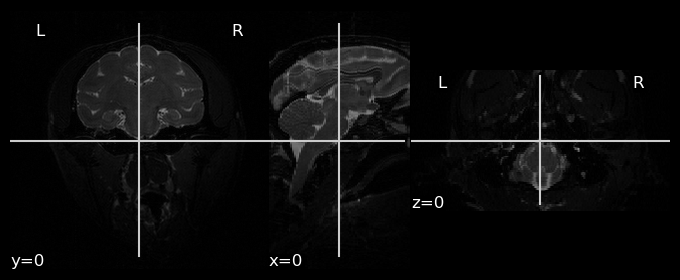

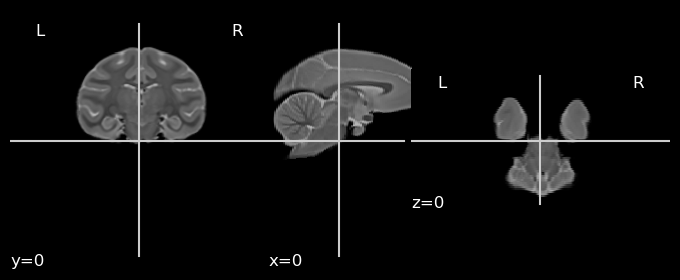

In [2]:
sub_bse_t2 = '/deneb_disk/macaque_atlas_data/test_data/MAC10.nii.gz'
sub_mask_t2 = '/deneb_disk/macaque_atlas_data/test_data/MAC10.mask.nii.gz'
atlas_bse_t2 = '/deneb_disk/macaque_atlas_data/macaque_atlas/ONPRC18_atlas_v1/ONPRC18_Templates/ONPRC18_T2W_brain.nii.gz'
centered_atlas = '/deneb_disk/macaque_atlas_data/test_data/atlas.nii.gz'




fixed_image=sitk.ReadImage(sub_bse_t2,sitk.sitkFloat32);
moving_image=sitk.ReadImage(atlas_bse_t2,sitk.sitkFloat32)
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

final_transform,_ = multires_registration(fixed_image, moving_image, initial_transform)

moved_image = sitk.Resample(moving_image, fixed_image, final_transform)

sitk.WriteImage(moved_image, centered_atlas)


plot_anat(centered_atlas,cut_coords=(0,0,0))
plot_anat(sub_bse_t2,cut_coords=(0,0,0))

atlas = ni.resample_to_img(centered_atlas,sub_bse_t2)
plot_anat(atlas,cut_coords=(0,0,0))


"""
reader = sitk.ImageSeriesReader()
fixed_image = sitk.ReadImage(sub_bse_t2, sitk.sitkFloat32)
moving_image = sitk.ReadImage(atlas_bse_t2, sitk.sitkFloat32)



gui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   
                      title_list = ['fixed image', 'moving image']);
"""

(256, 80, 256)


/home/ajoshi/anaconda3/lib/python3.10/site-packages/nilearn/plotting/find_cuts.py:143: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(


(137, 80, 166)


TypeError: in method 'CenteredTransformInitializer', argument 1 of type 'itk::simple::Image const &'

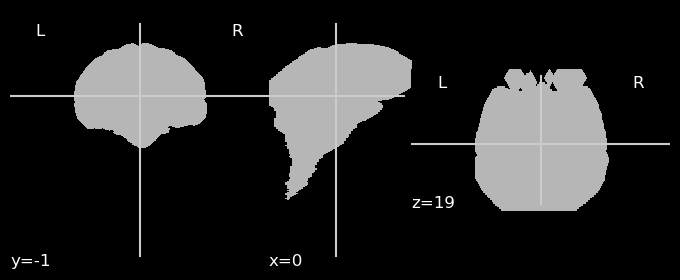

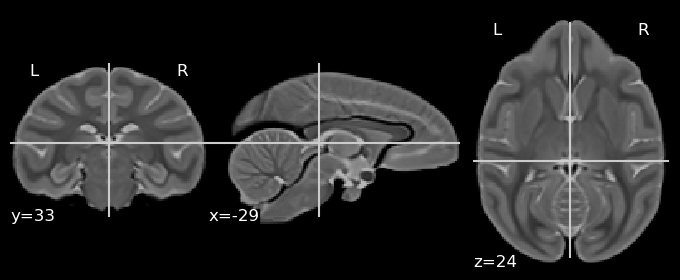

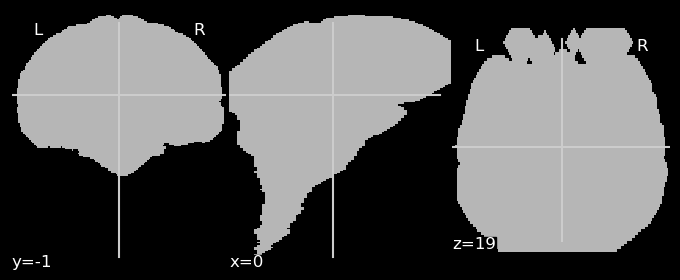

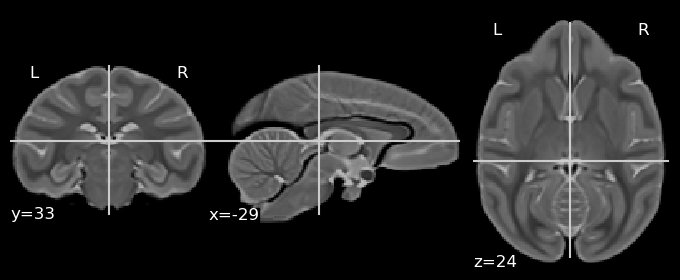

In [3]:
sub_msk = ni.load_img(sub_mask_t2)
print(sub_msk.shape)
plot_anat(sub_msk)
plot_anat(atlas_bse_t2)

sub_msk=ni.crop_img(sub_msk)
atlas=ni.crop_img(atlas_bse_t2)

print(sub_msk.shape)
plot_anat(sub_msk)
plot_anat(atlas)



fixed_image=sub_bse_t2
moving_image=atlas_bse_t2
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

final_transform,_ = multires_registration(fixed_image, moving_image, initial_transform)



atlas = ni.resample_to_img(atlas,sub_msk)
plot_anat(atlas)
